## Land Use Data Analysis - Region de Maule 
2009 and 2016 data files
Data originated from CONAF SIT website (link)
Analysis of data, including total coverage of region by land-use type, subtype, and specific vegetation, as well as change in coverage over time between two periods


In [1]:
import ee
import geemap
import geopandas as gpd
import numpy as np

#Read in the data
gdf_2016 = gpd.read_file('data/07_regi_n_del_maule_actualizaci_n_2016/2016_LandUse_ML_Clean.shp') 
gdf_2009 = gpd.read_file('data/07__regi_n_del_maule_2009/2009_LandUse_ML_Clean.shp') 
gdf_1999 = gpd.read_file('data/07__regi_n_del_maule_1999/1999_LandUse_ML_Clean.shp')  

# Calculate total area by subuse
subuso_area = gdf_2016.groupby('SUBUSO')['SUPERF_HA'].sum().reset_index()
subuso_area = subuso_area.sort_values(by='SUPERF_HA', ascending=False)

# Display the result
print(subuso_area)

                                    SUBUSO  SUPERF_HA
10                              Plantación  634893.44
1                            Bosque Nativo  581514.91
13                 Terreno de Uso Agrícola  372299.89
4                                 Matorral  221057.01
11                                Praderas  169435.96
5                    Matorral Arborescente  117746.77
7                         Matorral-Pradera   54951.18
9                                   Nieves   48363.01
0                             Bosque Mixto   28674.71
2    Ciudades, Pueblos, Zonas Industriales   26086.44
3       Lagos, Lagunas, Embalses, Tranques   18984.84
12                                    Ríos   17084.91
15  Vegetación Herbácea en Orillas de Ríos     521.79
8                       Minería Industrial     516.38
14                                   Vegas     488.52
6                  Matorral con Suculentas     215.52


In [10]:
summary_2016 = gdf_2016[['ID_USO', 'USO', 'ID_SUBUSO', 'SUBUSO']].value_counts().reset_index(name='count').sort_values(by=['ID_USO','ID_SUBUSO'])
summary_2009 = gdf_2009[['ID_USO', 'USO', 'ID_SUBUSO', 'SUBUSO']].value_counts().reset_index(name='count').sort_values(by=['ID_USO','ID_SUBUSO'])
summary_1999 = gdf_1999[['ID_USO', 'USO', 'ID_SUBUSO', 'SUBUSO']].value_counts().reset_index(name='count').sort_values(by=['ID_USO','ID_SUBUSO'])


In [11]:
summary_1999

,ID_USO,USO,ID_SUBUSO,SUBUSO,count
9,01,Áreas Urbanas e Industriales,01,"Ciudades, Pueblos, Zonas Industriales",214
15,01,Áreas Urbanas e Industriales,02,Minería Industrial,3
4,02,Terrenos Agrícolas,01,Terreno de Uso Agrícola,2899
5,03,Praderas y Matorrales,01,Praderas,2367
6,03,Praderas y Matorrales,02,Matorral-Pradera,1763
0,03,Praderas y Matorrales,03,Matorral,11334
2,03,Praderas y Matorrales,04,Matorral Arborescente,7680
13,03,Praderas y Matorrales,05,Matorral con Suculentas,29
1,04,Bosques,01,Plantación,11082
3,04,Bosques,02,Bosque Nativo,6427


In [12]:
summary_2009

,ID_USO,USO,ID_SUBUSO,SUBUSO,count
9,01,Áreas Urbanas e Industriales,01,"Ciudades, Pueblos, Zonas Industriales",509
15,01,Áreas Urbanas e Industriales,02,Minería Industrial,11
5,02,Terrenos Agrícolas,01,Terreno de Uso Agrícola,1712
4,03,Praderas y Matorrales,01,Praderas,1960
6,03,Praderas y Matorrales,02,Matorral-Pradera,1479
1,03,Praderas y Matorrales,03,Matorral,7185
3,03,Praderas y Matorrales,04,Matorral Arborescente,6093
13,03,Praderas y Matorrales,05,Matorral con Suculentas,31
0,04,Bosques,01,Plantación,18800
2,04,Bosques,02,Bosque Nativo,6602


In [13]:
summary_2016

,ID_USO,USO,ID_SUBUSO,SUBUSO,count
9,01,Áreas Urbanas e Industriales,01,"Ciudades, Pueblos, Zonas Industriales",1451
12,01,Áreas Urbanas e Industriales,02,Minería Industrial,103
4,02,Terrenos Agrícolas,01,Terreno de Uso Agrícola,4463
5,03,Praderas y Matorrales,01,Praderas,4410
6,03,Praderas y Matorrales,02,Matorral-Pradera,2957
2,03,Praderas y Matorrales,03,Matorral,12454
3,03,Praderas y Matorrales,04,Matorral Arborescente,10290
15,03,Praderas y Matorrales,05,Matorral con Suculentas,4
0,04,Bosques,01,Plantación,37536
1,04,Bosques,02,Bosque Nativo,30783


In [14]:
### Land Use types and subtypes - total area
# Step 1: Create the table with counts
uso_counts_2016 = (
    gdf_2016[['ID_USO', 'USO', 'ID_SUBUSO', 'SUBUSO']]
    .value_counts()
    .reset_index(name='count')
    .sort_values(by=['ID_USO', 'ID_SUBUSO'])
)

# Step 2: Calculate the sum of 'SUPERF_HA' grouped by 'SUBUSO'
subuso_superf_sum_2016 = (
    gdf_2016.groupby('SUBUSO', as_index=False)['SUPERF_HA']
    .sum()
    .rename(columns={'SUPERF_HA': 'TOTAL_SUPERF_HA'})
)

# Step 3: Merge the tables on 'SUBUSO'
result_2016 = uso_counts_2016.merge(subuso_superf_sum_2016, on='SUBUSO', how='left')

# Display the final table
result_2016

,ID_USO,USO,ID_SUBUSO,SUBUSO,count,TOTAL_SUPERF_HA
0,01,Áreas Urbanas e Industriales,01,"Ciudades, Pueblos, Zonas Industriales",1451,26086.44
1,01,Áreas Urbanas e Industriales,02,Minería Industrial,103,516.38
2,02,Terrenos Agrícolas,01,Terreno de Uso Agrícola,4463,372299.89
3,03,Praderas y Matorrales,01,Praderas,4410,169435.96
4,03,Praderas y Matorrales,02,Matorral-Pradera,2957,54951.18
5,03,Praderas y Matorrales,03,Matorral,12454,221057.01
6,03,Praderas y Matorrales,04,Matorral Arborescente,10290,117746.77
7,03,Praderas y Matorrales,05,Matorral con Suculentas,4,215.52
8,04,Bosques,01,Plantación,37536,634893.44
9,04,Bosques,02,Bosque Nativo,30783,581514.91


In [15]:

# Step 1: Create the table with counts
uso_counts_2009 = (
    gdf_2009[['ID_USO', 'USO', 'ID_SUBUSO', 'SUBUSO']]
    .value_counts()
    .reset_index(name='count')
    .sort_values(by=['ID_USO', 'ID_SUBUSO'])
)

# Step 2: Calculate the sum of 'SUPERF_HA' grouped by 'SUBUSO'
subuso_superf_sum_2009 = (
    gdf_2009.groupby('SUBUSO', as_index=False)['SUPERF_HA']
    .sum()
    .rename(columns={'SUPERF_HA': 'TOTAL_SUPERF_HA'})
)

# Step 3: Merge the tables on 'SUBUSO'
result_2009 = uso_counts_2009.merge(subuso_superf_sum_2009, on='SUBUSO', how='left')

# Display the final table
result_2009

,ID_USO,USO,ID_SUBUSO,SUBUSO,count,TOTAL_SUPERF_HA
0,01,Áreas Urbanas e Industriales,01,"Ciudades, Pueblos, Zonas Industriales",509,16017.6
1,01,Áreas Urbanas e Industriales,02,Minería Industrial,11,164.9
2,02,Terrenos Agrícolas,01,Terreno de Uso Agrícola,1712,563675.6
3,03,Praderas y Matorrales,01,Praderas,1960,218229.7
4,03,Praderas y Matorrales,02,Matorral-Pradera,1479,67786.0
5,03,Praderas y Matorrales,03,Matorral,7185,295672.1
6,03,Praderas y Matorrales,04,Matorral Arborescente,6093,163283.5
7,03,Praderas y Matorrales,05,Matorral con Suculentas,31,1471.7
8,04,Bosques,01,Plantación,18800,607593.8
9,04,Bosques,02,Bosque Nativo,6602,384714.0


In [16]:

# Step 1: Create the table with counts
uso_counts_1999 = (
    gdf_1999[['ID_USO', 'USO', 'ID_SUBUSO', 'SUBUSO']]
    .value_counts()
    .reset_index(name='count')
    .sort_values(by=['ID_USO', 'ID_SUBUSO'])
)

# Step 2: Calculate the sum of 'SUPERF_HA' grouped by 'SUBUSO'
subuso_superf_sum_1999 = (
    gdf_1999.groupby('SUBUSO', as_index=False)['SUPERF_HA']
    .sum()
    .rename(columns={'SUPERF_HA': 'TOTAL_SUPERF_HA'})
)

# Step 3: Merge the tables on 'SUBUSO'
result_1999 = uso_counts_1999.merge(subuso_superf_sum_1999, on='SUBUSO', how='left')

# Display the final table
result_1999

,ID_USO,USO,ID_SUBUSO,SUBUSO,count,TOTAL_SUPERF_HA
0,01,Áreas Urbanas e Industriales,01,"Ciudades, Pueblos, Zonas Industriales",214,12885.5
1,01,Áreas Urbanas e Industriales,02,Minería Industrial,3,104.9
2,02,Terrenos Agrícolas,01,Terreno de Uso Agrícola,2899,571870.9
3,03,Praderas y Matorrales,01,Praderas,2367,226079.8
4,03,Praderas y Matorrales,02,Matorral-Pradera,1763,79159.8
5,03,Praderas y Matorrales,03,Matorral,11334,385137.3
6,03,Praderas y Matorrales,04,Matorral Arborescente,7680,185461.8
7,03,Praderas y Matorrales,05,Matorral con Suculentas,29,1213.4
8,04,Bosques,01,Plantación,11082,473948.5
9,04,Bosques,02,Bosque Nativo,6427,373699.3


/var/folders/nv/zss1vllj0ng4zcrk888wbjh80000gn/T/ipykernel_77681/1169617331.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_all, x="Year", y="TOTAL_SUPERF_HA", hue="USO", marker="o", linewidth=2, ci=None)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWa

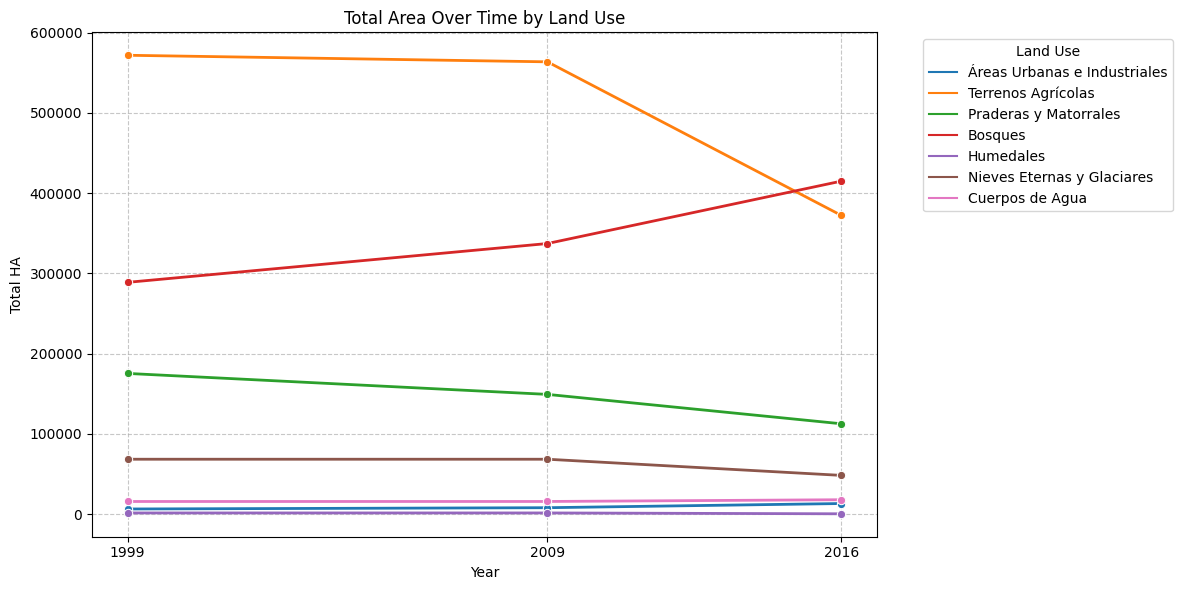

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Add a Year column to each table
result_2016['Year'] = 2016
result_2009['Year'] = 2009
result_1999['Year'] = 1999

# Step 2: Combine all data into one DataFrame
df_all = pd.concat([result_1999, result_2009, result_2016])

# Step 3: Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_all, x="Year", y="TOTAL_SUPERF_HA", hue="USO", marker="o", linewidth=2, ci=None)

# Formatting
plt.title("Total Area Over Time by Land Use")
plt.xlabel("Year")
plt.ylabel("Total HA")
plt.xticks([1999, 2009, 2016])  # Ensure correct x-axis labels
plt.legend(title="Land Use", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/nv/zss1vllj0ng4zcrk888wbjh80000gn/T/ipykernel_77681/1668864435.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_all_subset, x="Year", y="TOTAL_SUPERF_HA", hue="SUBUSO", marker="o", linewidth=2, ci=None)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1075:

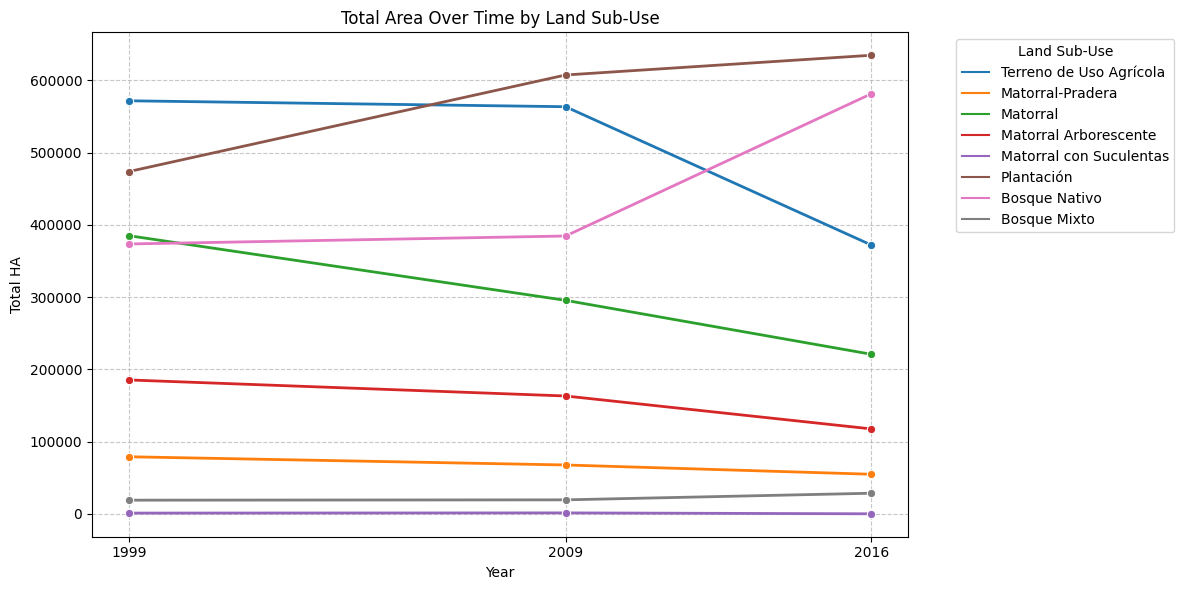

In [25]:
df_all_subset = df_all[df_all['SUBUSO'].isin(['Plantación','Bosque Nativo','Bosque Mixto','Terreno de Uso Agrícola','Praderad','Matorral','Matorral-Pradera','Matorral Arborescente','Matorral con Suculentas'])]
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_all_subset, x="Year", y="TOTAL_SUPERF_HA", hue="SUBUSO", marker="o", linewidth=2, ci=None)

# Formatting
plt.title("Total Area Over Time by Land Sub-Use")
plt.xlabel("Year")
plt.ylabel("Total HA")
plt.xticks([1999, 2009, 2016])  # Ensure correct x-axis labels
plt.legend(title="Land Sub-Use", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/nv/zss1vllj0ng4zcrk888wbjh80000gn/T/ipykernel_77681/1778971741.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_all[df_all['USO'] == 'Áreas Urbanas e Industriales'], x="Year", y="TOTAL_SUPERF_HA", hue="SUBUSO", marker="o", linewidth=2, ci=None)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.

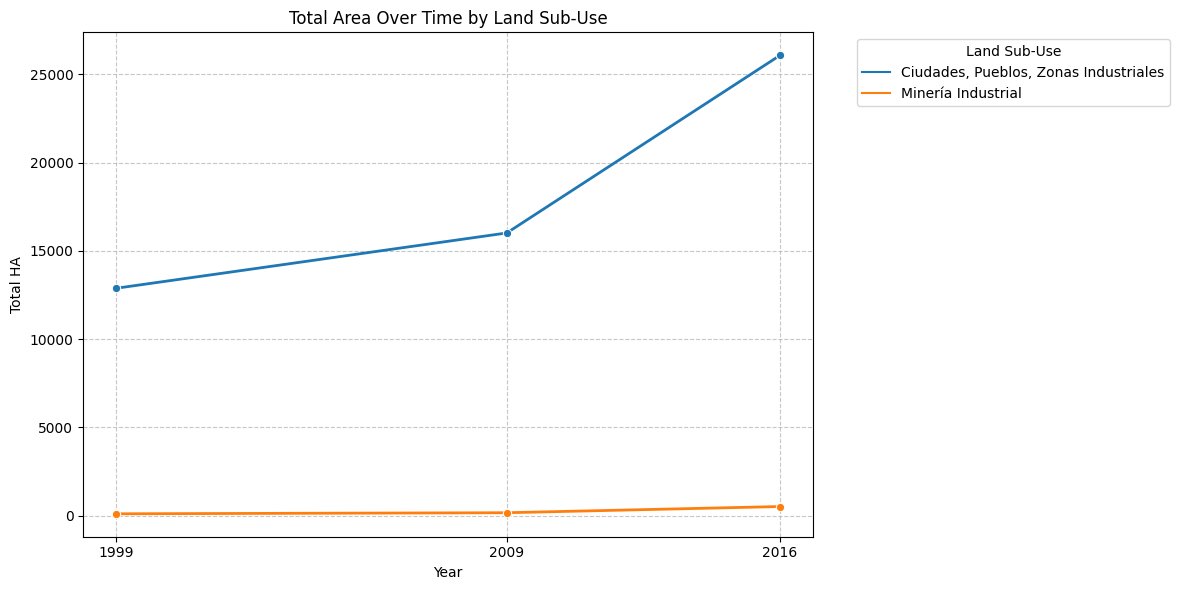

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_all[df_all['USO'] == 'Áreas Urbanas e Industriales'], x="Year", y="TOTAL_SUPERF_HA", hue="SUBUSO", marker="o", linewidth=2, ci=None)

# Formatting
plt.title("Areas Urbanas: Total Area Over Time by Land Sub-Use")
plt.xlabel("Year")
plt.ylabel("Total HA")
plt.xticks([1999, 2009, 2016])  # Ensure correct x-axis labels
plt.legend(title="Land Sub-Use", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/nv/zss1vllj0ng4zcrk888wbjh80000gn/T/ipykernel_77681/3450476594.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_all[df_all['USO'] == 'Praderas y Matorrales'], x="Year", y="TOTAL_SUPERF_HA", hue="SUBUSO", marker="o", linewidth=2, ci=None)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site

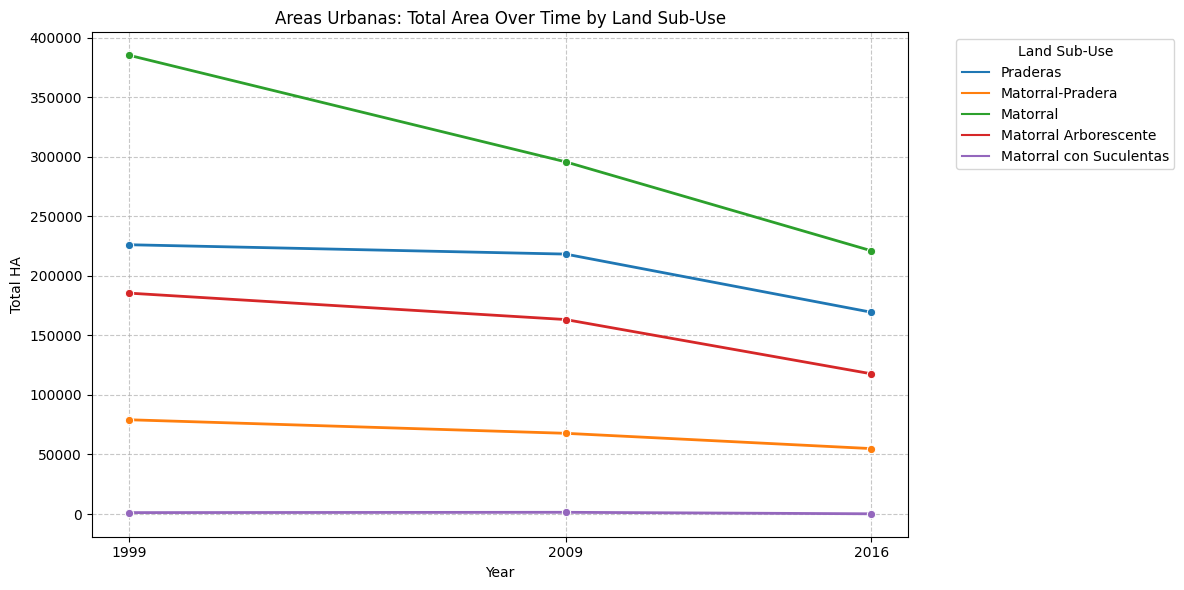

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_all[df_all['USO'] == 'Praderas y Matorrales'], x="Year", y="TOTAL_SUPERF_HA", hue="SUBUSO", marker="o", linewidth=2, ci=None)

# Formatting
plt.title("Praderas and Matorrales: Total Area Over Time by Land Sub-Use")
plt.xlabel("Year")
plt.ylabel("Total HA")
plt.xticks([1999, 2009, 2016])  # Ensure correct x-axis labels
plt.legend(title="Land Sub-Use", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/nv/zss1vllj0ng4zcrk888wbjh80000gn/T/ipykernel_77681/343032194.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_all[df_all['USO'] == 'Humedales'], x="Year", y="TOTAL_SUPERF_HA", hue="SUBUSO", marker="o", linewidth=2, ci=None)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sea

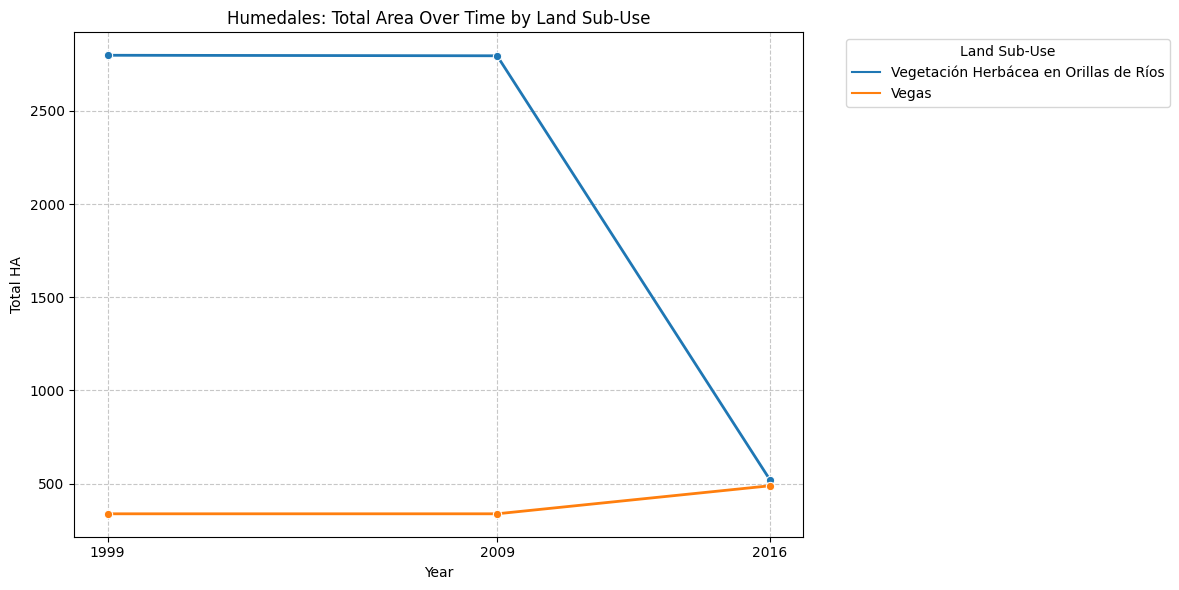

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_all[df_all['USO'] == 'Humedales'], x="Year", y="TOTAL_SUPERF_HA", hue="SUBUSO", marker="o", linewidth=2, ci=None)

# Formatting
plt.title("Humedales: Total Area Over Time by Land Sub-Use")
plt.xlabel("Year")
plt.ylabel("Total HA")
plt.xticks([1999, 2009, 2016])  # Ensure correct x-axis labels
plt.legend(title="Land Sub-Use", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/nv/zss1vllj0ng4zcrk888wbjh80000gn/T/ipykernel_77681/169933460.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_all[df_all['USO'] == 'Nieves Eternas y Glaciares'], x="Year", y="TOTAL_SUPERF_HA", hue="SUBUSO", marker="o", linewidth=2, ci=None)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/

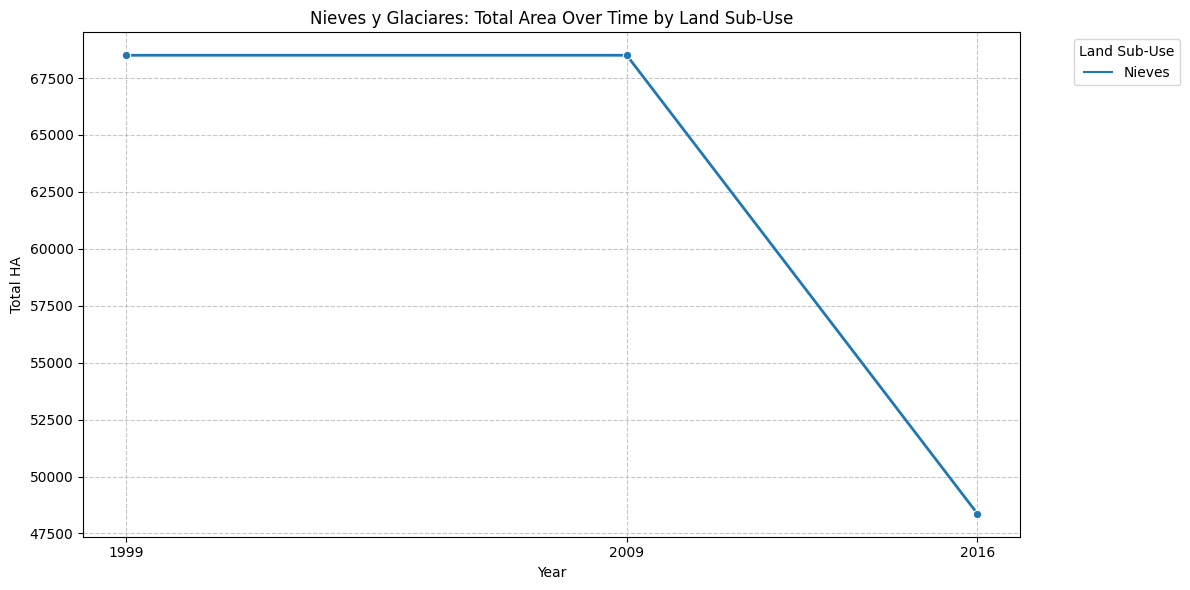

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_all[df_all['USO'] == 'Nieves Eternas y Glaciares'], x="Year", y="TOTAL_SUPERF_HA", hue="SUBUSO", marker="o", linewidth=2, ci=None)

# Formatting
plt.title("Nieves y Glaciares: Total Area Over Time by Land Sub-Use")
plt.xlabel("Year")
plt.ylabel("Total HA")
plt.xticks([1999, 2009, 2016])  # Ensure correct x-axis labels
plt.legend(title="Land Sub-Use", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/nv/zss1vllj0ng4zcrk888wbjh80000gn/T/ipykernel_77681/3236507123.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_all[df_all['USO'] == 'Cuerpos de Agua'], x="Year", y="TOTAL_SUPERF_HA", hue="SUBUSO", marker="o", linewidth=2, ci=None)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packa

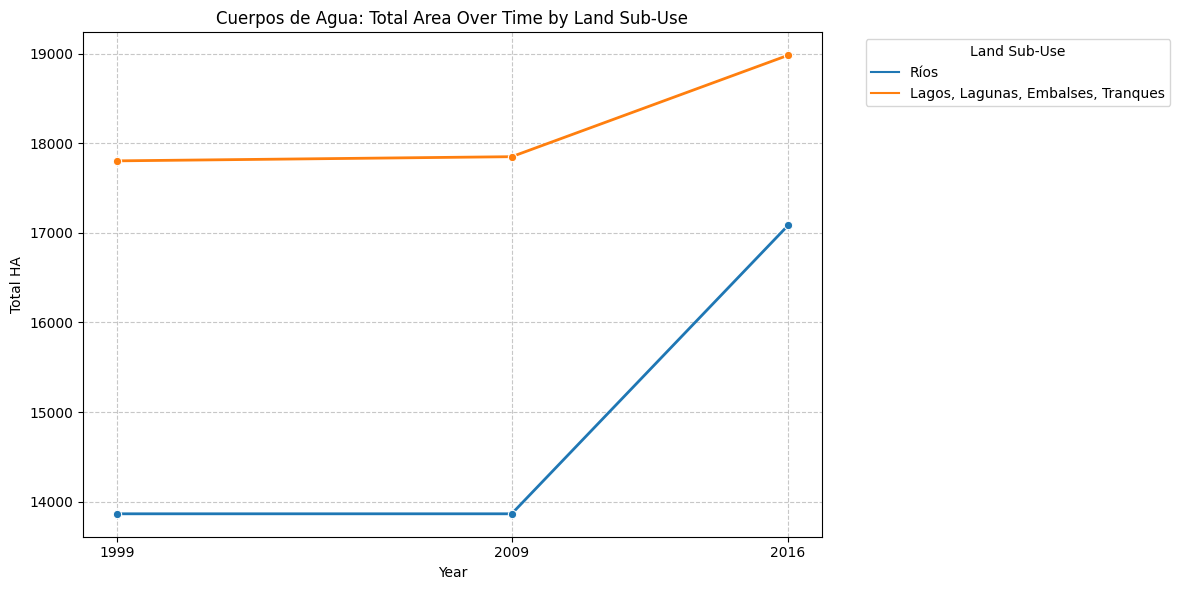

In [32]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_all[df_all['USO'] == 'Cuerpos de Agua'], x="Year", y="TOTAL_SUPERF_HA", hue="SUBUSO", marker="o", linewidth=2, ci=None)

# Formatting
plt.title("Cuerpos de Agua: Total Area Over Time by Land Sub-Use")
plt.xlabel("Year")
plt.ylabel("Total HA")
plt.xticks([1999, 2009, 2016])  # Ensure correct x-axis labels
plt.legend(title="Land Sub-Use", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [35]:
### Focusing Just on 2016 
gdf_2016.columns

Index(['ID', 'ID_USO', 'ID_SUBUSO', 'ID_ESTRUC', 'ID_COBER', 'ID_ALTU',
       'ID_TIFO', 'ID_STIF', 'ID_ESP1', 'ID_ESP2', 'ID_ESP3', 'ID_ESP4',
       'ID_ESP5', 'ID_ESP6', 'ORG_ESP_CC', 'ID_ESP_CC1', 'ID_ESP_CC2',
       'CODREG', 'CODPROV', 'CODCOM', 'USO_TIERRA', 'USO', 'SUBUSO',
       'ESTRUCTURA', 'COBERTURA', 'ALTURA', 'TIPO_FORES', 'SUBTIPOFOR',
       'ESPECI1_CI', 'ESPECI2_CI', 'ESPECI3_CI', 'ESPECI4_CI', 'ESPECI5_CI',
       'ESPECI6_CI', 'ESPECI1_CO', 'ESPECI2_CO', 'ESPECI3_CO', 'ESPECI4_CO',
       'ESPECI5_CO', 'ESPECI6_CO', 'ESP_C1', 'ESP_C2', 'COOR_ESTE',
       'COOR_NORTE', 'NOM_SNASPE', 'TIPO_SNASP', 'NOM_REG', 'NOM_PROV',
       'NOM_COM', 'TC', 'TIPO_POLI', 'SUPERF_HA', 'geometry'],
      dtype='object')

In [44]:
### Plant species breakdown
# Step 1: Create the table with counts
gdf_filtered_bosque = gdf_2016[gdf_2016['USO'] == "Bosques"]

plant_counts_2016 = (
    gdf_filtered_bosque[['ESPECI1_CO']]
    .value_counts()
    .reset_index(name='count')
    .sort_values(by=['ESPECI1_CO'])
)

# Step 2: Calculate the sum of 'SUPERF_HA' grouped by 'SUBUSO'
subuso_superf_sum_2016 = (
    gdf_2016.groupby('ESPECI1_CO', as_index=False)['SUPERF_HA']
    .sum()
    .rename(columns={'SUPERF_HA': 'TOTAL_SUPERF_HA'})
)

# Step 3: Merge the tables on 'SUBUSO'
plant_counts_2016 = plant_counts_2016.merge(subuso_superf_sum_2016, on='ESPECI1_CO', how='left')

plant_counts_2016

,ESPECI1_CO,count,TOTAL_SUPERF_HA
0,Aromo,3175,19994.97
1,ArrayÃ¡n,6,63.81
2,Avellano,3,66.62
3,Belloto del sur,1,2.80
4,Boldo,930,16616.41
5,BollÃ©n,41,529.27
6,Canelo,43,350.22
7,CastaÃ±o,1,2.24
8,ChequÃ©n,24,137.87
9,Chin chin,1,17.63


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create the table with counts
forest_counts_2016 = (
    gdf_2016[['ID_TIFO', 'TIPO_FORES']]
    .value_counts()
    .reset_index(name='count')
    .sort_values(by=['ID_TIFO'])
)

# Step 2: Calculate the sum of 'SUPERF_HA' grouped by 'SUBUSO'
subuso_superf_sum_2016 = (
    gdf_2016.groupby('ID_TIFO', as_index=False)['SUPERF_HA']
    .sum()
    .rename(columns={'SUPERF_HA': 'TOTAL_SUPERF_HA'})
)

# Step 3: Merge the tables on 'ID_ESP1'
forest_counts_2016 = forest_counts_2016.merge(subuso_superf_sum_2016, on='ID_TIFO', how='left')

# Step 4: Plot total area by plant type
plt.figure(figsize=(12, 6))

sns.barplot(
    data=plant_counts_2016, 
    y='TIPO_FORES',  # Plant species names
    x='TOTAL_SUPERF_HA',  # Total area
    palette='viridis'
)

# Formatting the plot
plt.title('Total Area by Forest Type (2016)', fontsize=16)
plt.ylabel('Forest Type', fontsize=12)
plt.xlabel('Total Area (SUPERF_HA)', fontsize=12)
#plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


ValueError: Could not interpret input 'TIPO_FORES'

<Figure size 1200x600 with 0 Axes>

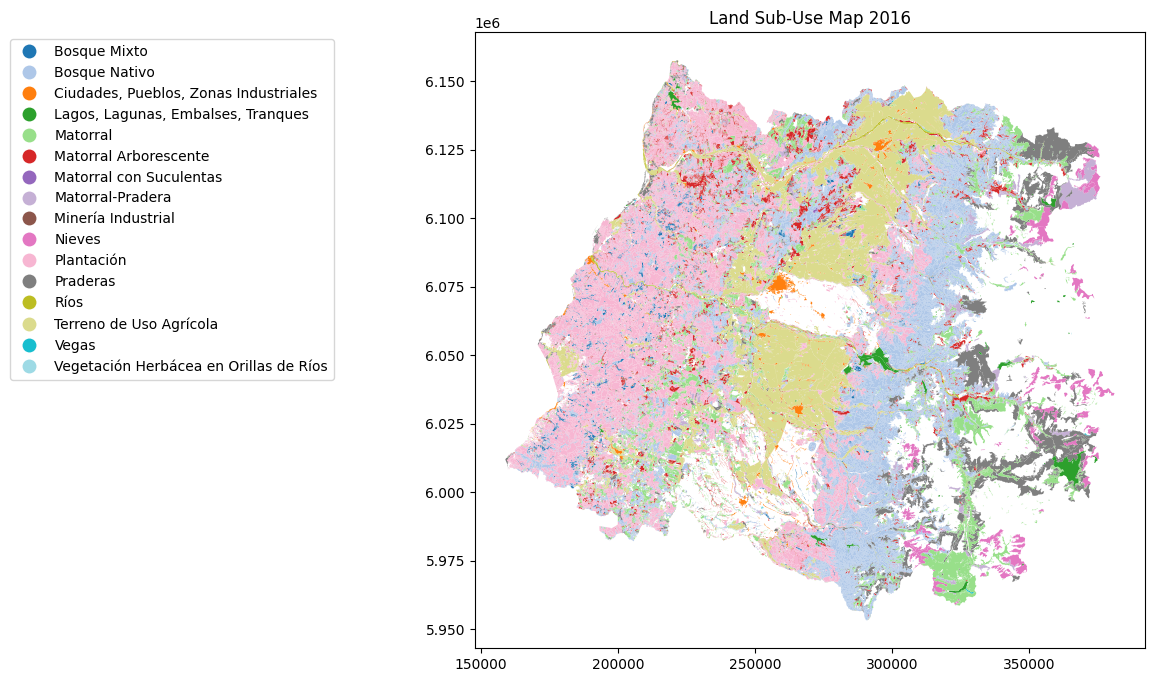

In [48]:
fig, ax = plt.subplots(figsize=(10, 8))
#gdf_filtered.plot(column='SUBUSO', cmap='tab20', legend=True, ax=ax)
gdf_2016.plot(column='SUBUSO', cmap='tab20', legend=True, ax=ax)

# Adjust legend position to the left
leg = ax.get_legend()
leg.set_bbox_to_anchor((-0.2, 1))  # Moves the legend outside the plot to the left

# Add title
plt.title("Land Sub-Use Map 2016")

plt.show()

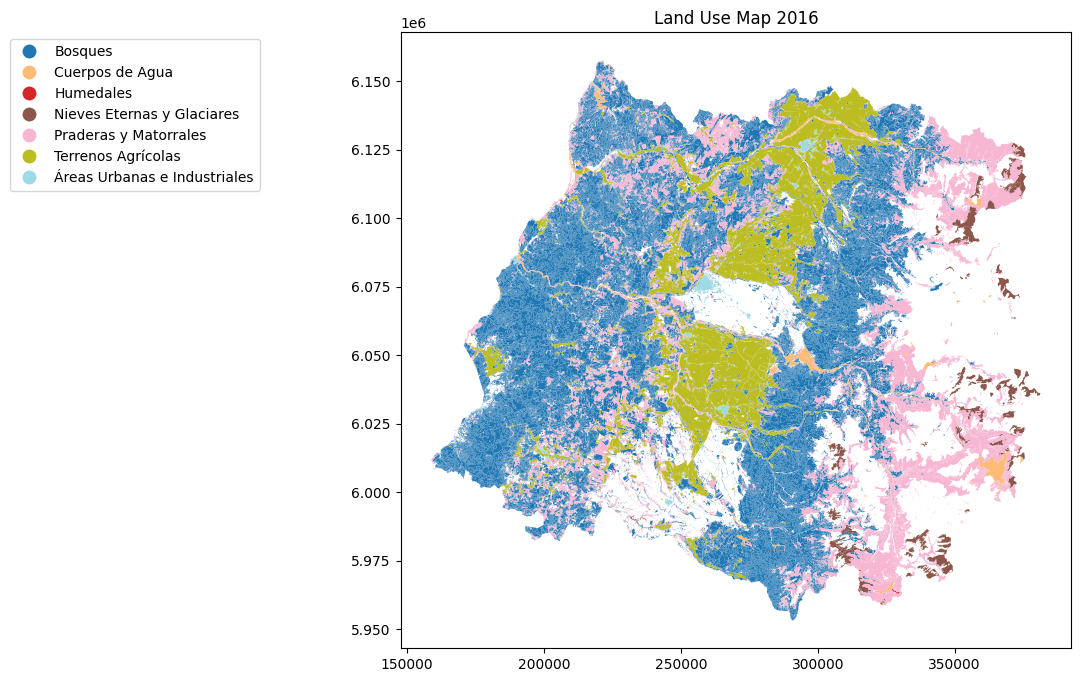

In [49]:
fig, ax = plt.subplots(figsize=(10, 8))
#gdf_filtered.plot(column='SUBUSO', cmap='tab20', legend=True, ax=ax)
gdf_2016.plot(column='USO', cmap='tab20', legend=True, ax=ax)

# Adjust legend position to the left
leg = ax.get_legend()
leg.set_bbox_to_anchor((-0.2, 1))  # Moves the legend outside the plot to the left

# Add title
plt.title("Land Use Map 2016")

plt.show()